# ENGR30004

## Week 10 - Graphs (1/2)

Today, we will be looking at graph algorithms: BFS and DFS, as well as graph representation.

### Learning Objectives

- Graph Representation
    - Represent graphs as adjacency matrices.
    - Represent graphs as adjacency lists.
    - Understand when each representation is useful than the other.
    
- Breadth First Search (BFS)
    - Understand and implement the Breadth First Search algorithm.
    - Understand use cases for BFS.
    - Understand time and space complexities of BFS.
    
- Depth First Search (DFS)
    - Understand and implement the Depth First Search algorithm.
    - Understand use cases for DFS.
    - Understand time and space complexities of DFS.

### Problem 1: Two ways of representing graphs

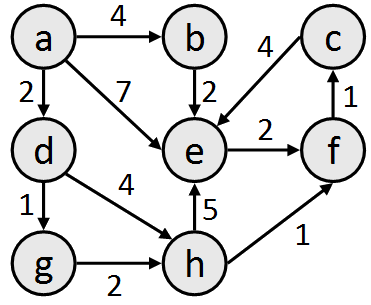

from: CS106B at Stanford

Represent this graph in both adjacency matrix and adjacency list formats.

Use both these representations in your answers to the next two questions.

In [4]:
# a=0, b=1, c=2, d=3, e=4, f=5, g=6, h=7

#Unweighted representation
al = [[1, 3, 4], #a
      [4], #b
      [4], #c
      [6, 7], #d
      [5], #e
      [2], #f
      [7], #g
      [4, 5], #h
     ]

#Weighted representation
      #a, b, c, d, e, f, g, h 
am = [[0, 4, 0, 2, 7, 0, 0, 0], #a
      [0, 0, 0, 0, 2, 0, 0, 0], #b
      [0, 0, 0, 0, 4, 0, 0, 0], #c
      [0, 0, 0, 0, 0, 0, 1, 4], #d
      [0, 0, 0, 0, 0, 2, 0, 0], #e
      [0, 0, 1, 0, 0, 0, 0, 0], #f
      [0, 0, 0, 0, 0, 0, 0, 2], #g
      [0, 0, 0, 0, 5, 0, 0, 0], #h
     ]

### Problem 2: Breadth First Search (BFS)

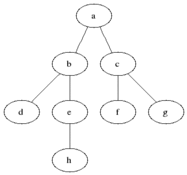

by: Blake Matheney (https://en.wikipedia.org/wiki/Breadth-first_search#/media/File:Animated_BFS.gif)

Start with node 'a' from the weighted graph above, and do a BFS traversal of the entire graph. (Let us not consider the weights for now)

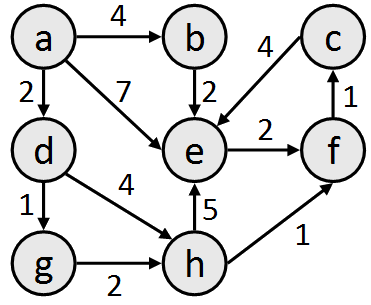

|Visited|Discovered|Unknown|
|---|---|---|
|[]|a|b, c, d, e, f, g, h|
|a|b, d, e|c, f, g, h|
|a, b|d, e, |c, f, g, h|
|a, b, d|e, g, h|c, f|
|a, b, d, e|g, h, f|c|
|a, b, d, e, g|h, f|c|
|a, b, d, e, g, h|f|c|
|a, b, d, e, g, h, f|c|[]|
|a, b, d, e, g, h, f, c|[]|[]|

Implement BFS traversal for both representations of the graph

In [34]:
def BFS_1(al, start):
    discovered = [start]
    visited = []
    
    while(len(discovered) > 0):
        node = discovered.pop(0)
        print(f'Visiting node: {node}')
        visited.append(node)
        for n in al[node]:
            if not (n in discovered or n in visited):
                discovered.append(n)
        print(f'Visited List {visited}')
        print(f'Discovered List {discovered}')
    return

BFS_1(al, 0)

Visiting node: 0
Visited List [0]
Discovered List [1, 3, 4]
Visiting node: 1
Visited List [0, 1]
Discovered List [3, 4]
Visiting node: 3
Visited List [0, 1, 3]
Discovered List [4, 6, 7]
Visiting node: 4
Visited List [0, 1, 3, 4]
Discovered List [6, 7, 5]
Visiting node: 6
Visited List [0, 1, 3, 4, 6]
Discovered List [7, 5]
Visiting node: 7
Visited List [0, 1, 3, 4, 6, 7]
Discovered List [5]
Visiting node: 5
Visited List [0, 1, 3, 4, 6, 7, 5]
Discovered List [2]
Visiting node: 2
Visited List [0, 1, 3, 4, 6, 7, 5, 2]
Discovered List []


In [37]:
def BFS_1(am, start):
    discovered = [start]
    visited = []
    
    while(len(discovered) > 0):
        node = discovered.pop(0)
        print(f'Visiting node: {node}')
        visited.append(node)
        for i in range(len(am[node])):
            if not (i in discovered or i in visited) and am[node][i]>0:
                discovered.append(i)
        print(f'Visited List {visited}')
        print(f'Discovered List {discovered}')
    return

BFS_1(am, 0)

Visiting node: 0
Visited List [0]
Discovered List [1, 3, 4]
Visiting node: 1
Visited List [0, 1]
Discovered List [3, 4]
Visiting node: 3
Visited List [0, 1, 3]
Discovered List [4, 6, 7]
Visiting node: 4
Visited List [0, 1, 3, 4]
Discovered List [6, 7, 5]
Visiting node: 6
Visited List [0, 1, 3, 4, 6]
Discovered List [7, 5]
Visiting node: 7
Visited List [0, 1, 3, 4, 6, 7]
Discovered List [5]
Visiting node: 5
Visited List [0, 1, 3, 4, 6, 7, 5]
Discovered List [2]
Visiting node: 2
Visited List [0, 1, 3, 4, 6, 7, 5, 2]
Discovered List []


### Problem 3: Depth First Search (DFS)

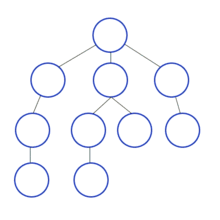

by: Mre (https://en.wikipedia.org/wiki/Depth-first_search#/media/File:Depth-First-Search.gif)

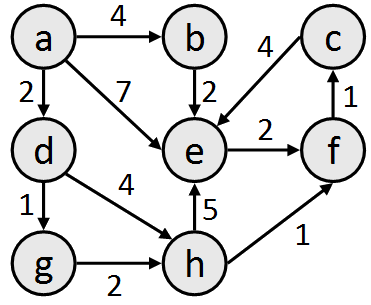

Perform a DFS traversal of this graph, starting with 'a'. (Discard the weights for now)

In [8]:
def DFS_1_rec(start, visited, al):
    print(f'visiting {start}')
    for node in al[start]:
        if not visited[node]:
            visited[node] = True
            DFS_1_rec(node, visited, al)

def DFS_1(al, start):
    visited = [False] * len(al)
    visited[start] = True
    DFS_1_rec(start, visited, al)

DFS_1(al, 0)

visiting 0
visiting 1
visiting 4
visiting 5
visiting 2
visiting 3
visiting 6
visiting 7


In [7]:
def DFS_2_rec(start, visited, am):
    print(f'visiting {start}')
    for i in range(len(am[start])):
        if (not visited[i]) and am[start][i]>0:
            visited[i] = True
            DFS_2_rec(i, visited, am)

def DFS_2(am, start):
    visited = [False] * len(am)
    visited[start] = True
    DFS_2_rec(start, visited, am)

DFS_2(am, 0)

visiting 0
visiting 1
visiting 4
visiting 5
visiting 2
visiting 3
visiting 6
visiting 7


### Problem 3: Calculating DFS distance between two nodes

Use the DFS algorithm to find the distance between a and h

In [60]:
def DFS_dist(start, visited, am, end):
    if start == end:
        print(f'visiting {start} and that is the end')
        return True
    print(f'visiting {start}')
    for i in range(len(am[start])):
        if (not visited[i]) and am[start][i]>0:
            visited[i] = True
            dist = int(DFS_dist(i, visited, am, end))
            if(dist > 0):
                return am[start][i] + dist
            
    return False

def distance(am, start, end):
    visited = [False] * len(al)
    visited[start] = True
    return DFS_dist(start, visited, am, end) - 1

distance(am, 0, 2)

visiting 0
visiting 1
visiting 4
visiting 5
visiting 2 and that is the end


9